In [1]:
%matplotlib inline

In [2]:
import sklearn, exifread, pandas

In [48]:
d = pandas.read_csv("/Users/joosep/Dropbox/diplohack_team2/training.csv")

In [52]:
vs = []
for cn in d_A.columns:
    if "ela" in cn or "bstat" in cn:
        vs += [cn]
for c in vs:
    d.loc[np.isinf(d[c]), c] = 0
    d.loc[np.isnan(d[c]), c] = 0

In [66]:
vs

['cela_hist_0',
 'cela_hist_10',
 'cela_hist_20',
 'cela_hist_30',
 'cela_hist_40',
 'cela_hist_50',
 'cela_hist_60',
 'bstat_64_0',
 'bstat_64_1',
 'bstat_64_2',
 'bstat_64_3',
 'bstat_64_4',
 'bstat_64_5',
 'bstat_64_6',
 'bstat_64_7',
 'bstat_64_8',
 'bstat_64_9']

In [53]:
d_A = d[d["rnd"] == 1]
d_B = d[d["rnd"] == 0]

In [54]:
len(d_A), len(d_B)

(1268, 3815)

In [55]:
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
bdt1 = GradientBoostingClassifier(n_estimators=300, max_depth=2, subsample=0.5)
bdt1.fit(d_A[vs], d_A["id"])

bdt2 = GradientBoostingClassifier(n_estimators=300, max_depth=2, subsample=0.5)
bdt2.fit(d_B[vs], d_B["id"])


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=None, subsample=0.5, verbose=0,
              warm_start=False)

In [56]:
for n1, method in [
    ("BDT1", bdt1),
    ("BDT2", bdt2)
    ]:
    for n2, data in [
        ("A", d_A),
        ("B", d_B)
    ]:
        accuracy = sklearn.metrics.accuracy_score(data["id"], method.predict(data[vs]))
        print n1, n2, accuracy

BDT1 A 0.91167192429
BDT1 B 0.81625163827
BDT2 A 0.831230283912
BDT2 B 0.873656618611


In [9]:
# for ind in data_bkg:
#     print ind
#     tag = read_exif(ind)
#     if len(tag) > 0:
#         if tag.has_key("EXIF LensModel"):
#             print tag["EXIF LensModel"]

In [10]:
from IPython.display import Image

In [11]:
import sys
sys.path += ["/Users/joosep/Documents/GetThePicture/"]
import get_data

In [12]:
list(d_A[d_A["id"]==0]["fn"])[4]

'/Users/joosep/Dropbox/diplohack_team2/photos/training/true/00011_2_scale.jpg'

In [13]:
i1 = "/Users/joosep/Dropbox/diplohack_team2/photos/training/true/ucid00970.jpg"
i2 = "/Users/joosep/Dropbox/diplohack_team2/photos/training/fake/ucid00970_fake.jpg"

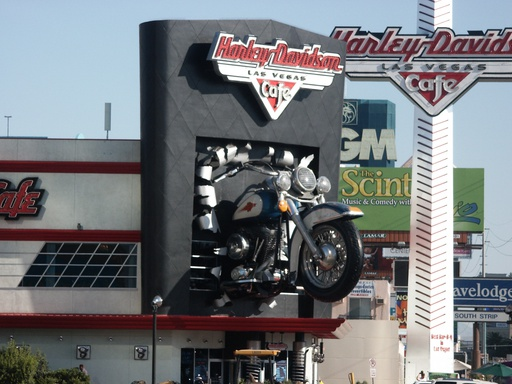

In [14]:
Image(filename=i1)

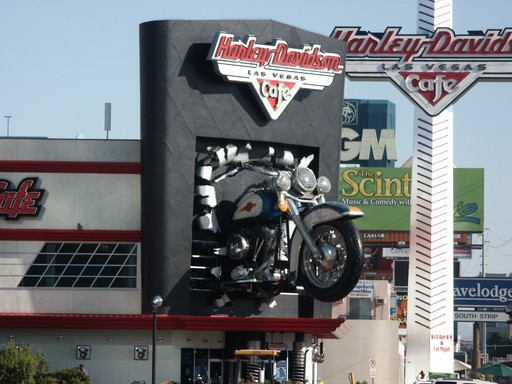

In [15]:
Image(filename=i2)

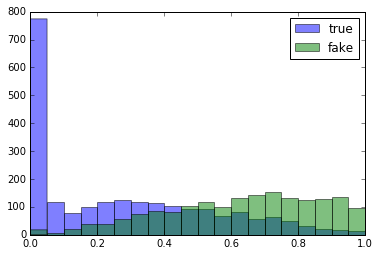

In [16]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(bdt1.predict_proba(d_B[d_B["id"]==0][vs])[:, 1], bins=np.linspace(0,1,21), alpha=0.5, label="true");
plt.hist(bdt1.predict_proba(d_B[d_B["id"]==1][vs])[:, 1], bins=np.linspace(0,1,21), alpha=0.5, label="fake");
#plt.yscale("log")
plt.legend(loc="best")

In [17]:
import glob
real = glob.glob("/Users/joosep/Dropbox/diplohack_team2/photos/Robert/*")

In [18]:
%matplotlib inline

In [19]:
import PIL

/Users/joosep/Dropbox/diplohack_team2/photos/Robert/00467683-6188a172539515aa3f999d621cbe975b.jpg
/Users/joosep/Dropbox/diplohack_team2/photos/Robert/00472652-bee6d4dc568ad003cfe3a07c3a0fea50.jpg
/Users/joosep/Dropbox/diplohack_team2/photos/Robert/cdokumenteundein-07c194ad68717ad41d1c473708410fec.jpg
/Users/joosep/Dropbox/diplohack_team2/photos/Robert/cdokumenteundein-2fbaf5be28320ecd52e8cda61e299bc4.jpg
/Users/joosep/Dropbox/diplohack_team2/photos/Robert/cdokumenteundein-4ece5828d65e79343fdf420c6e2b4b55.jpg
/Users/joosep/Dropbox/diplohack_team2/photos/Robert/cdokumenteundein-71a2993aeb44739b248d3c8a477970fe.jpg
/Users/joosep/Dropbox/diplohack_team2/photos/Robert/cdokumenteundein-7862cb71031aba5dcea56cc81058aab4.jpg


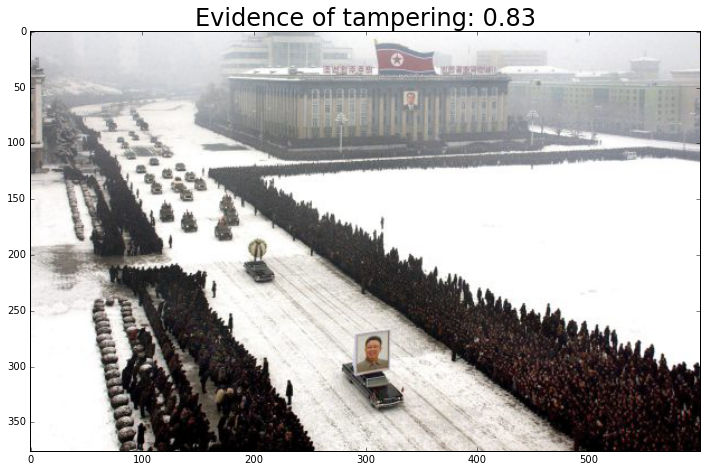

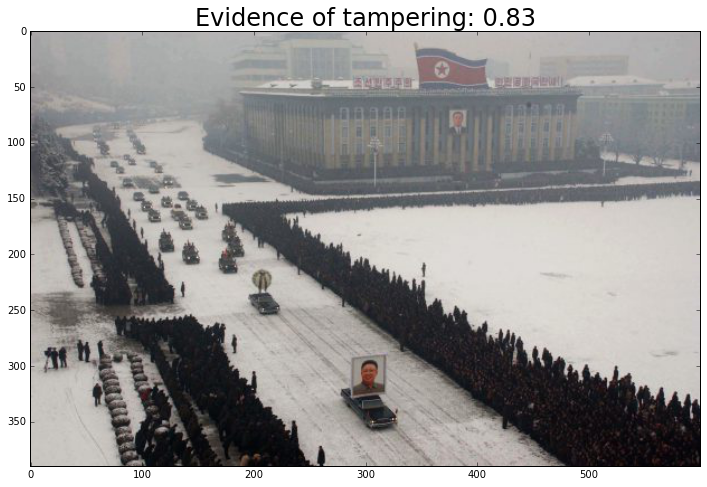

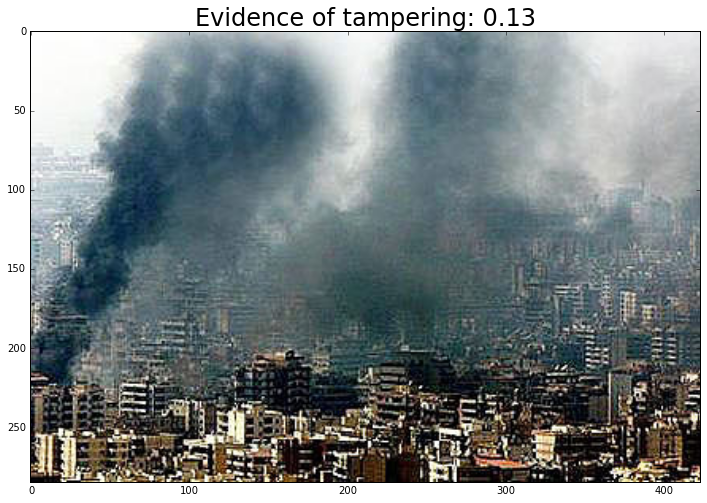

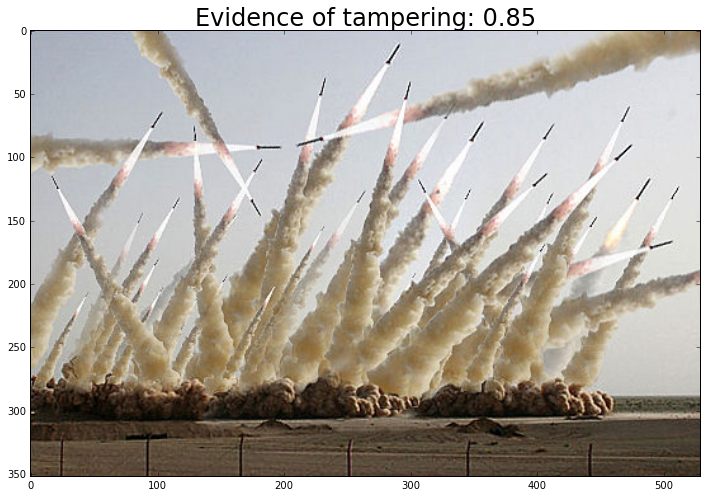

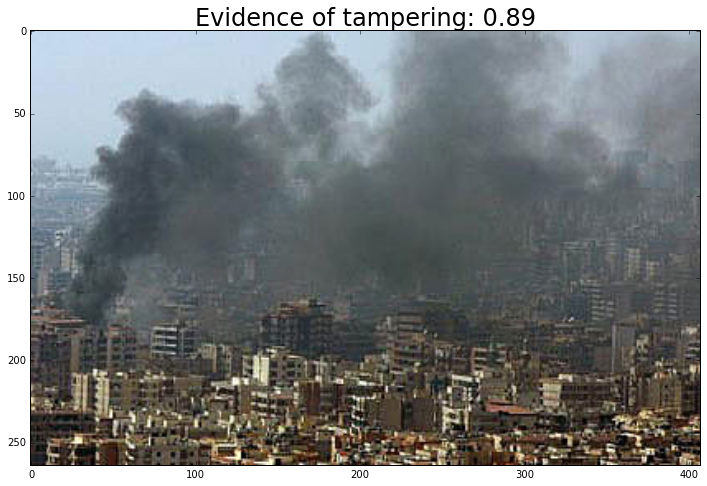

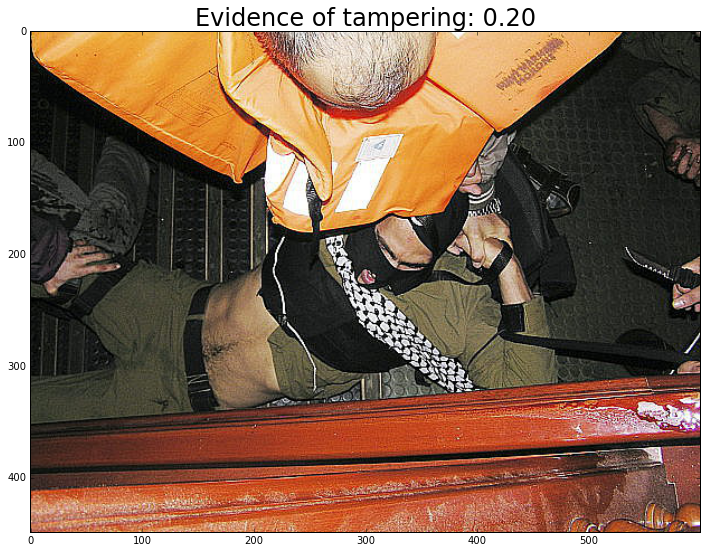

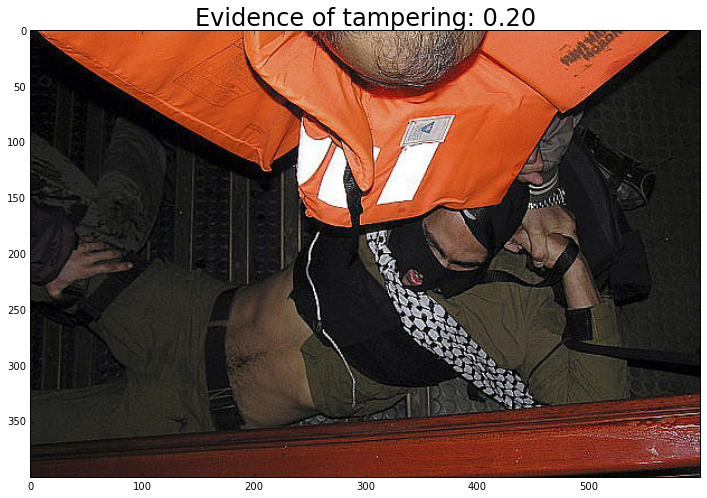

In [20]:
import matplotlib.image as mpimg
for r in real:
    plt.figure(figsize=(12,12))
    i = mpimg.imread(r)
    plt.imshow(i)
    score = bdt2.predict_proba(
        get_data.get_image_data(r)[vs]
    )
    plt.title("Evidence of tampering: %.2f" % score[:,1], fontsize=24)

In [57]:
import pickle

In [58]:
s1 = pickle.dumps(bdt1)

In [59]:
s2 = pickle.dumps(bdt2)

In [60]:
of1 = open("/Users/joosep/Dropbox/diplohack_team2/bdt1.pkl", "w")
of1.write(s1)
of1.close()

In [61]:
of2 = open("/Users/joosep/Dropbox/diplohack_team2/bdt2.pkl", "w")
of2.write(s2)
of2.close()

In [62]:
real2 = glob.glob("/Users/joosep/Dropbox/diplohack_team2/photos/training/fake/nikon_7tamp7*")

In [63]:
real2

['/Users/joosep/Dropbox/diplohack_team2/photos/training/fake/nikon_7tamp7.jpg']

/Users/joosep/Dropbox/diplohack_team2/photos/training/fake/nikon_7tamp7.jpg


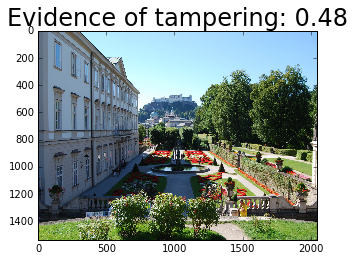

In [64]:
import matplotlib.image as mpimg
for r in real2:
    plt.figure(figsize=(5, 5))
    i = mpimg.imread(r)
    plt.imshow(i)
    score = bdt2.predict_proba(
        get_data.get_image_data(r)[vs]
    )
    plt.title("Evidence of tampering: %.2f" % score[:,1], fontsize=24)

In [65]:
ela = get_data.get_ela(real2[0])

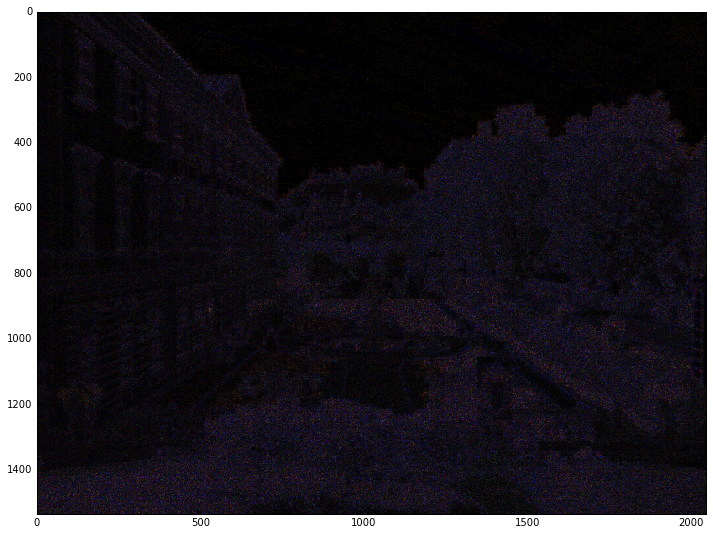

In [30]:
plt.figure(figsize=(12,12))
plt.imshow(ela)

In [31]:
import cv2

In [32]:
i = cv2.imread(real2[0], cv2.CV_LOAD_IMAGE_GRAYSCALE)

In [33]:
surf = cv2.SURF(10000)

In [34]:
kp, des = surf.detectAndCompute(i,None)

In [35]:
img2 = cv2.drawKeypoints(i, kp, None, (255, 0, 0),4)

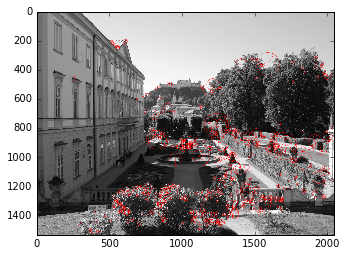

In [36]:
plt.imshow(img2)

In [41]:
get_data.get_image_data(real[0])

/Users/joosep/Dropbox/diplohack_team2/photos/Robert/00467683-6188a172539515aa3f999d621cbe975b.jpg


fn  cela_hist_0  \
0  /Users/joosep/Dropbox/diplohack_team2/photos/R...     0.313923   

   cela_hist_10  cela_hist_20  cela_hist_30  cela_hist_40  cela_hist_50  \
0      0.494346      0.499945      0.499998      0.992564      0.999816   

   cela_hist_60  bstat_64_0  bstat_64_1  bstat_64_2  bstat_64_3  bstat_64_4  \
0      0.999998    0.450593    1.494071    0.055336           0           0   

   bstat_64_5  bstat_64_6  bstat_64_7  bstat_64_8  bstat_64_9  type    rnd  
0           0           0           0           0           0     1  False